# Data Analysis for Career+

# Day 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

path = "../Dataset/naukri_com-job_sample.csv"
df = pd.read_csv(path)
print(df.head())
print(df.info())

                                      company  \
0                            MM Media Pvt Ltd   
1                          find live infotech   
2         Softtech Career Infosystem Pvt. Ltd   
3                      Onboard HRServices LLP   
4  Spire Technologies and Solutions Pvt. Ltd.   

                                           education   experience  \
0  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    0 - 1 yrs   
1  UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...    0 - 0 yrs   
2  UG: Any Graduate - Any Specialization PG:Any P...    4 - 8 yrs   
3  UG: Any Graduate - Any Specialization PG:CA Do...  11 - 15 yrs   
4  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    6 - 8 yrs   

                                   industry  \
0          Media / Entertainment / Internet   
1  Advertising / PR / MR / Event Management   
2           IT-Software / Software Services   
3    Banking / Financial Services / Broking   
4           IT-Software / Software Services   

       

In [3]:
df.rename(columns = {'joblocation_address': 'location',
                    'jobtitle': 'job_title',
                    'jobdescription': 'description',
                    'numberofpositions': 'num_positions',
                    'payrate': 'salary',
                    'postdate': 'date_posted',
                    'site_name': 'source',
                    'uniq_id': 'id'}, inplace=True)

In [4]:
numerical = ["jobid", "num_positions"]
df[numerical].describe()

,jobid,num_positions
count,2.200000e+04,4464.000000
mean,1.561171e+11,45.116935
std,9.423956e+10,186.197193
min,1.011600e+10,1.000000
25%,6.121650e+10,2.000000
50%,1.602169e+11,4.000000
75%,2.502166e+11,10.000000
max,3.112155e+11,2000.000000


In [5]:
print(df.shape)

(22000, 14)


In [6]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [company, education, experience, industry, description, jobid, location, job_title, num_positions, salary, date_posted, source, skills, id]
Index: []


In [7]:
missing_values = df.isnull().sum()
print("Missing values per coloumn:\n",missing_values)

Missing values per coloumn:
 company              4
education         1996
experience           4
industry             5
description          4
jobid                0
location           501
job_title            0
num_positions    17536
salary              97
date_posted         23
source           18013
skills             528
id                   0
dtype: int64


In [8]:
missing_percent = (df.isnull().sum()) / len(df)*100
print("Missing percentage of values per coloumn:\n",missing_percent)

Missing percentage of values per coloumn:
 company           0.018182
education         9.072727
experience        0.018182
industry          0.022727
description       0.018182
jobid             0.000000
location          2.277273
job_title         0.000000
num_positions    79.709091
salary            0.440909
date_posted       0.104545
source           81.877273
skills            2.400000
id                0.000000
dtype: float64


#### we have some columns with very large missing data, e.g., education (1996 missing), num_positions (17,536 missing), source (18,013 missing).


Columns with very few missing values (like company, experience, industry, description):You can drop rows or fill with placeholders like "Unknown":


In [9]:
df["company"].fillna("Unknown", inplace= True)
df["experience"].fillna("Not specified", inplace= True)
df["industry"].fillna("Other", inplace= True)
df["description"].fillna("No description", inplace= True)

/var/folders/67/f0htb9ms0fzfnqpg6vwskkm40000gn/T/ipykernel_71486/441080095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna("Unknown", inplace= True)
/var/folders/67/f0htb9ms0fzfnqpg6vwskkm40000gn/T/ipykernel_71486/441080095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [10]:
job_title_counts = df["job_title"].value_counts().head(10) 
print(job_title_counts)

job_title
Business Development Executive    93
Business Development Manager      92
Software Engineer                 81
Project Manager                   67
Android Developer                 65
Web Designer                      61
Content Writer                    59
Senior Software Engineer          58
Sales Executive                   56
PHP Developer                     54
Name: count, dtype: int64


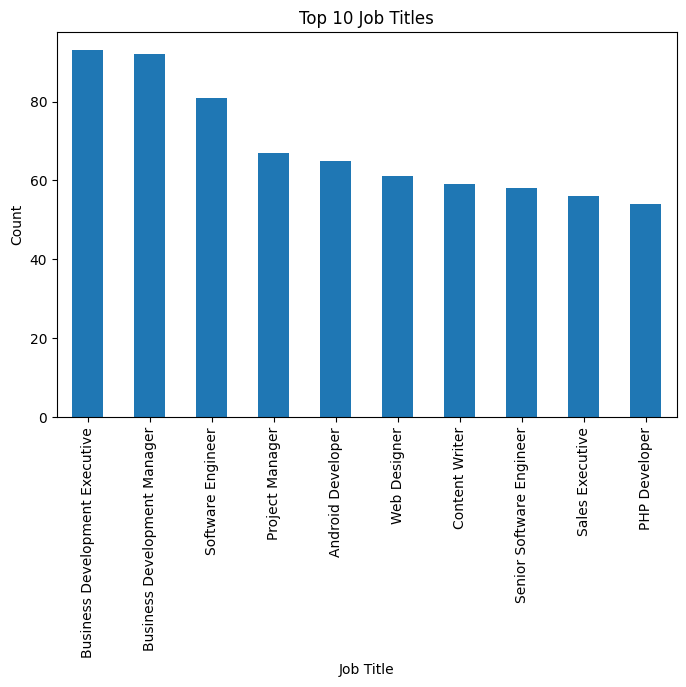

In [11]:
job_title_counts.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()


In [12]:
print(df["salary"])

0               1,50,000 - 2,25,000 P.A
1        1,50,000 - 2,50,000 P.A. 20000
2            Not Disclosed by Recruiter
3            Not Disclosed by Recruiter
4            Not Disclosed by Recruiter
                      ...              
21995        Not Disclosed by Recruiter
21996          8,50,000 - 14,00,000 P.A
21997        Not Disclosed by Recruiter
21998        Not Disclosed by Recruiter
21999         12,00,000 - 22,00,000 P.A
Name: salary, Length: 22000, dtype: object


In [13]:
import re
import numpy as np

def parse_salary(s):
    if pd.isna(s):
        return np.nan

    s_lower = s.lower()

    # Skip non-numeric salaries
    if "not disclosed" in s_lower or "company norms" in s_lower:
        return np.nan

    # Remove commas and extra spaces
    s_clean = s_lower.replace(",", "").replace(" ", "")

    # Detect units
    multiplier = 1
    if "lpa" in s_clean:
        multiplier = 100000
        s_clean = s_clean.replace("lpa", "")
    elif "k" in s_clean:
        multiplier = 1000
        s_clean = s_clean.replace("k", "")
    elif "permonth" in s_clean or "pm" in s_clean:
        multiplier = 12  # convert monthly to annual
        s_clean = re.sub(r'permonth|pm', '', s_clean)

    # Extract numbers
    nums = re.findall(r'\d+', s_clean)
    nums = [int(n) for n in nums]

    if len(nums) >= 2:
        salary = np.mean(nums[:2]) * multiplier  # use first two numbers if range
    elif len(nums) == 1:
        salary = nums[0] * multiplier
    else:
        return np.nan

    # Remove extreme outliers
    if salary < 50000 or salary > 5000000:
        return np.nan

    return salary




In [14]:
df["salary_cleaned"] = df["salary"].apply(parse_salary)

# Check results
print(df[["salary", "salary_cleaned"]].head(20))
print(df["salary_cleaned"].describe())


                                               salary  salary_cleaned
0                             1,50,000 - 2,25,000 P.A        187500.0
1                      1,50,000 - 2,50,000 P.A. 20000        200000.0
2                          Not Disclosed by Recruiter             NaN
3                          Not Disclosed by Recruiter             NaN
4                          Not Disclosed by Recruiter             NaN
5                          Not Disclosed by Recruiter             NaN
6                             3,00,000 - 6,50,000 P.A        475000.0
7                          Not Disclosed by Recruiter             NaN
8                             1,00,000 - 2,00,000 P.A        150000.0
9                          Not Disclosed by Recruiter             NaN
10                         Not Disclosed by Recruiter             NaN
11                         Not Disclosed by Recruiter             NaN
12                            1,75,000 - 2,50,000 P.A        212500.0
13                  

# Observations
## Count = 4428
These are the rows with valid numeric salaries.
The remaining rows (~NaN) are undisclosed salaries.
## Salary Range
Min: 50,000 → entry-level jobs.
Max: 5,000,000 → high-paying senior roles.
Median: 387,500 → typical salary in the dataset.
## Percentiles
25% = 250,000, 50% = 387,500, 75% = 750,000 → shows most jobs fall in 2–7.5 LPA range.
## Outliers removed 
No unrealistic huge numbers or tiny misparsed numbers.

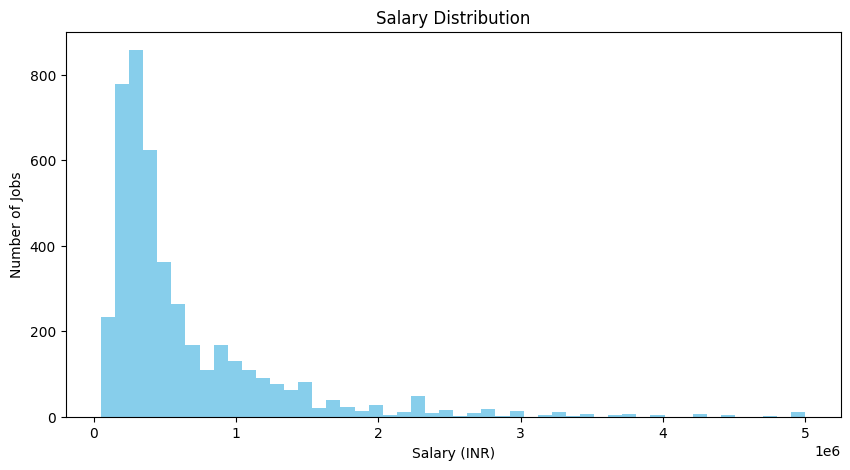

In [15]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(df["salary_cleaned"].dropna(), bins=50, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary (INR)")
plt.ylabel("Number of Jobs")
plt.show()

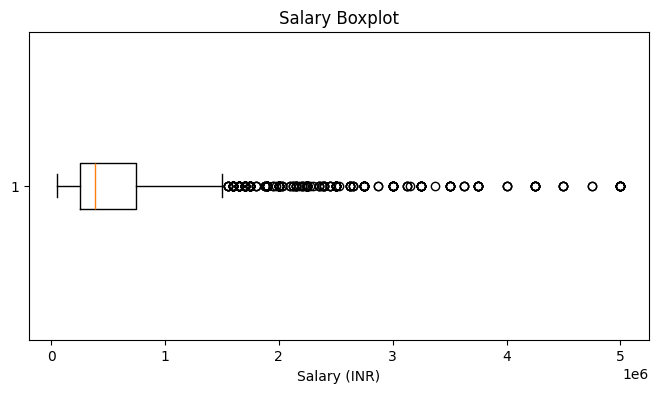

In [16]:
plt.figure(figsize=(8,4))
plt.boxplot(df["salary_cleaned"].dropna(), vert=False)
plt.title("Salary Boxplot")
plt.xlabel("Salary (INR)")
plt.show()


In [17]:
# Group by job title
job_salary = df.groupby('job_title')['salary_cleaned'].mean().sort_values(ascending=False)

# Show top 10 highest paying jobs
print(job_salary.head(10))

job_title
Mobile Solution Architects                                             5000000.0
Unica                                                                  5000000.0
DGM / GM - Govt Regulatory Affairs - Smartphone Giant - Delhi / NCR    5000000.0
Immediate Job Opening -- Sharepoint                                    5000000.0
Java Application Support Consultant                                    5000000.0
Brand Director                                                         5000000.0
Director Sales & Marketing                                             5000000.0
Chief Technology Officer                                               5000000.0
Business Head-industrial Consumable-mnc-chennai                        5000000.0
Head - Digital Marketing & Strategy - Internet/online                  5000000.0
Name: salary_cleaned, dtype: float64


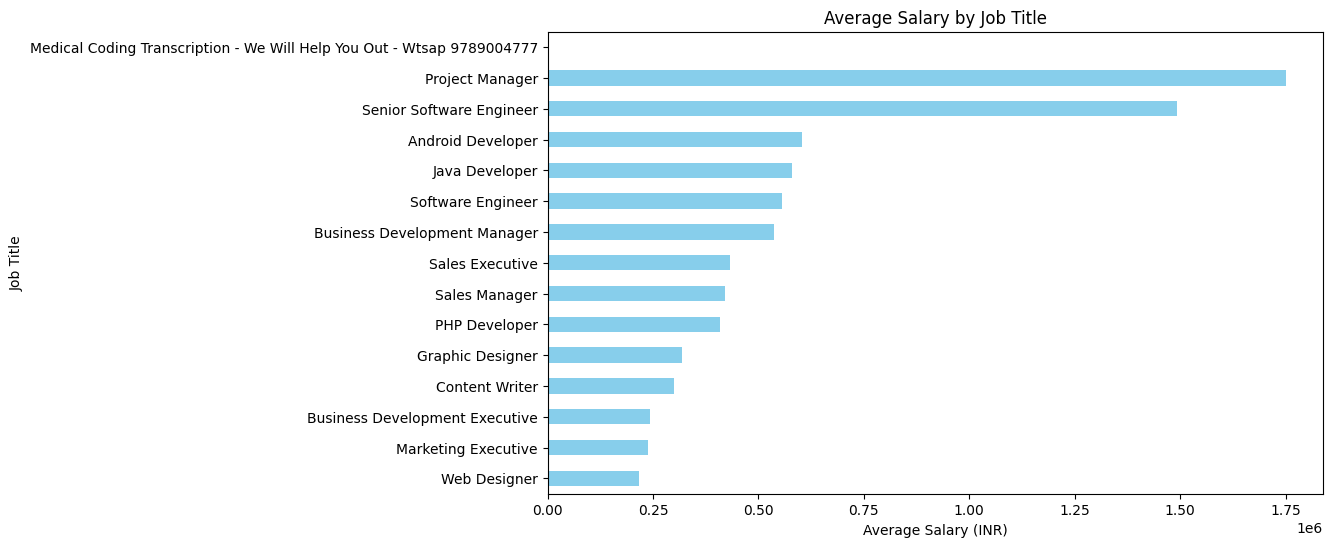

In [23]:
top_jobs = df['job_title'].value_counts().head(15).index
df_top = df[df['job_title'].isin(top_jobs)]

# Average salary per job title
avg_salary = df_top.groupby('job_title')['salary_cleaned'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10,6))
avg_salary.plot(kind='barh', color='skyblue')
plt.xlabel("Average Salary (INR)")
plt.ylabel("Job Title")
plt.title("Average Salary by Job Title")
plt.show()

In [19]:
location_counts = df["location"].value_counts()
print(location_counts.head(20))

location
Bengaluru/Bangalore                                         3775
Mumbai                                                      2348
Bengaluru                                                   1453
Hyderabad / Secunderabad                                    1246
Chennai                                                     1204
Hyderabad                                                    936
Noida                                                        775
Delhi                                                        763
Gurgaon                                                      743
Mumbai , Mumbai                                              514
Delhi/NCR(National Capital Region)                           383
Bengaluru/Bangalore , Bengaluru / Bangalore                  360
Delhi , Delhi                                                324
Noida , Noida/Greater Noida                                  313
Gurgaon , Gurgaon                                            148
Bengaluru/Bangal

In [107]:
print(df.columns)


Index(['company', 'education', 'experience', 'industry', 'description',
       'jobid', 'location', 'job_title', 'num_positions', 'salary',
       'date_posted', 'source', 'skills', 'id', 'salary_cleaned'],
      dtype='object')


In [21]:
print(df.head())

                                      company  \
0                            MM Media Pvt Ltd   
1                          find live infotech   
2         Softtech Career Infosystem Pvt. Ltd   
3                      Onboard HRServices LLP   
4  Spire Technologies and Solutions Pvt. Ltd.   

                                           education   experience  \
0  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    0 - 1 yrs   
1  UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...    0 - 0 yrs   
2  UG: Any Graduate - Any Specialization PG:Any P...    4 - 8 yrs   
3  UG: Any Graduate - Any Specialization PG:CA Do...  11 - 15 yrs   
4  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    6 - 8 yrs   

                                   industry  \
0          Media / Entertainment / Internet   
1  Advertising / PR / MR / Event Management   
2           IT-Software / Software Services   
3    Banking / Financial Services / Broking   
4           IT-Software / Software Services   

       

In [24]:
df.to_csv("day1_cleaned.csv", index=False)